# Waveform Analysis From image

In [217]:
# import 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('../')
from Constants import Constants
import pandas as pd

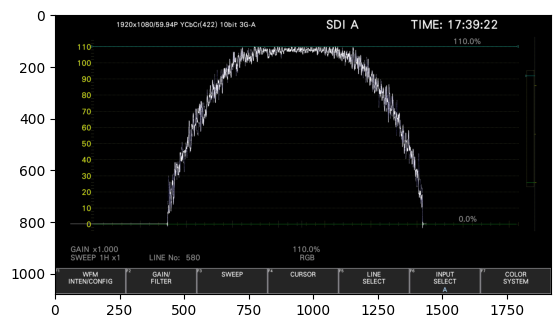

In [218]:
# define directories
img_dir = Constants.LOCAL_FILE_PATH_BMP
img_dir = "E:\\M15\\Leader LV5600 PoC\\Dataset\\RDI Dataset\\RAW\\Light Level 37\\light_level_37_1.bmp"
img = cv2.imread(img_dir)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


# display image
plt.imshow(img)
plt.show()


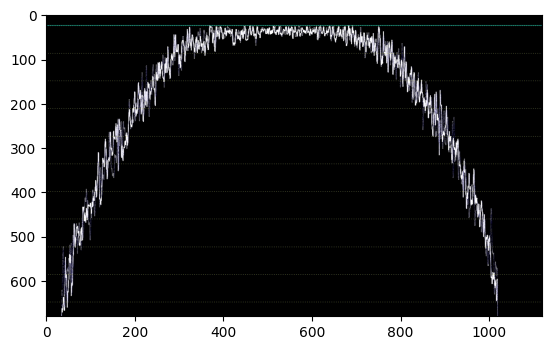

In [219]:
roi = img[100:780, 400:1520]
plt.imshow(roi)
plt.show()

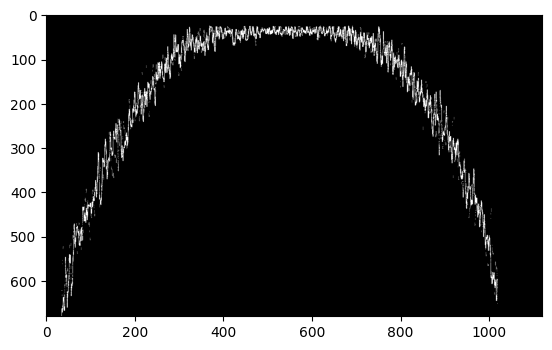

In [220]:
# isolate the blue pixels
lower_blue = np.array([0,0,200])
upper_blue = np.array([100,100,255])
mask = cv2.inRange(roi, lower_blue, upper_blue)

# isolate the white pixels
lower_white = np.array([200,200,200])
upper_white = np.array([255,255,255])
mask = cv2.inRange(roi, lower_white, upper_white)

# display the mask
plt.imshow(mask, cmap='gray')
plt.show()


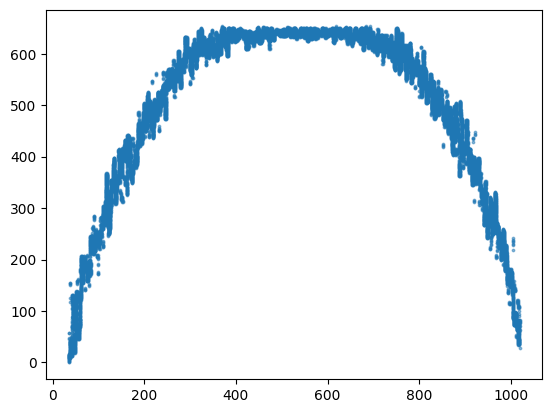

In [221]:
# extract pixel coordinates of the blue pixels
y,x = np.where(mask==255)
y = max(y) - y

# export to csv
df = pd.DataFrame({'x':x, 'y':y})

# sort based on x 
df = df.sort_values(by=['x'])

# display the image
plt.scatter(x,y,s=3,alpha=0.5)
plt.show()


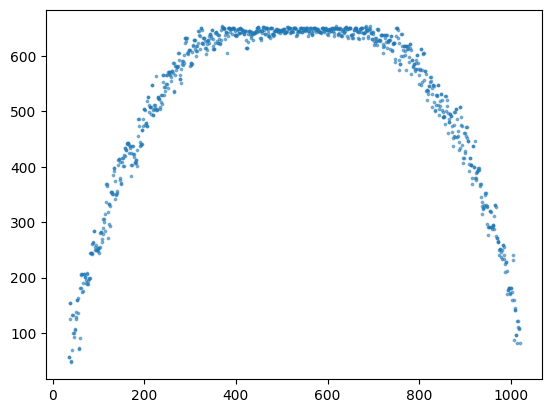

In [222]:
# for the same x, average the y
df = df.groupby('x').max().reset_index()

# display the image
plt.scatter(df['x'],df['y'],s=3,alpha=0.5)
plt.show()

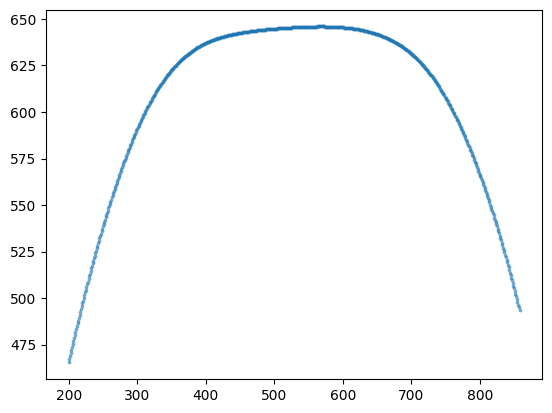

In [227]:
# make every point the avaerage of the 20 points around it
df['y'] = df['y'].rolling(30,center=True).mean()

# display the image
plt.scatter(df['x'],df['y'],s=3,alpha=0.5)
plt.show()

645.9653571111111


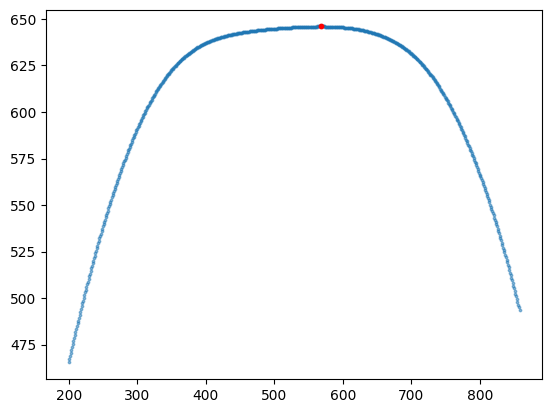

In [228]:
# extract peak value
peak = df['y'].max()

# extract peak location
peak_location = df['x'][df['y'].idxmax()]


# display peak position on image
plt.scatter(df['x'],df['y'],s=3,alpha=0.5)
plt.scatter(peak_location,peak,s=10,alpha=1,c='r')
# print peak value
print(peak)
plt.show()



In [230]:
# import necessary libraries
import cv2
import numpy as np
import pandas as pd
import os

# define directories
root_dir = "E:\\M15\\Leader LV5600 PoC\\Dataset\\RDI Dataset\\RAW"

# define color boundaries
lower_blue = np.array([0,0,200])
upper_blue = np.array([100,100,255])

lower_white = np.array([200,200,200])
upper_white = np.array([255,255,255])

# initialize empty dataframe
df_main = pd.DataFrame(columns=['Subfolder', 'Image', 'Peak'])

# iterate over each directory
for subdir, dirs, files in os.walk(root_dir):
    for file in files:
        # construct full file path
        file_path = os.path.join(subdir, file)

        # read the image
        img = cv2.imread(file_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # extract the region of interest
        roi = img[100:780, 400:1520]

        # isolate the blue or white pixels, create a mask
        mask = cv2.inRange(roi, lower_white, upper_white) # use lower_blue, upper_blue if needed

        # extract pixel coordinates of the blue pixels
        y, x = np.where(mask==255)
        y = max(y) - y

        # construct a dataframe from x and y
        df = pd.DataFrame({'x':x, 'y':y})

        # for the same x, average the y
        df = df.groupby('x').max().reset_index()

        # make every point the average of the 20 points around it
        df['y'] = df['y'].rolling(100,center=True).mean()

        # extract peak value
        peak = df['y'].max()

        # append to the main dataframe
        df_main = pd.concat([df_main, pd.DataFrame({
            'Subfolder': [os.path.basename(subdir)], 
            'Image': [file], 
            'Peak': [peak]
        })], ignore_index=True)



In [231]:
# save to a csv file
df_main.to_csv('E:\\M15\\Leader LV5600 PoC\\Dataset\\RDI Dataset\\peak.csv', index=False)

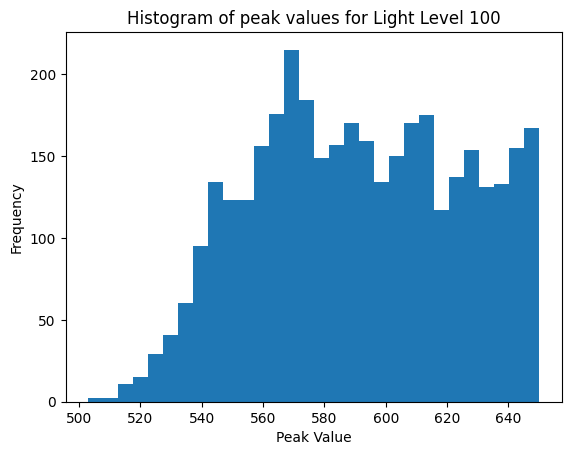

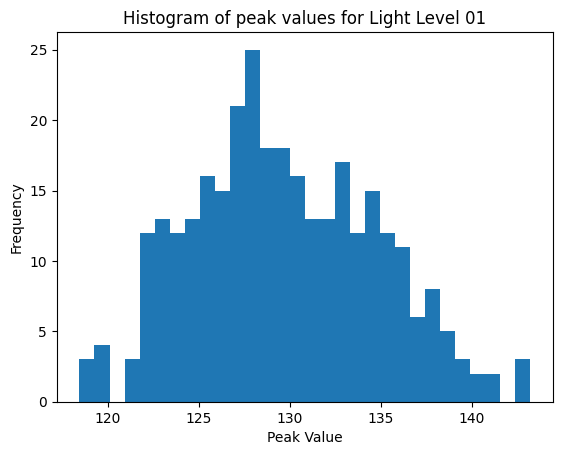

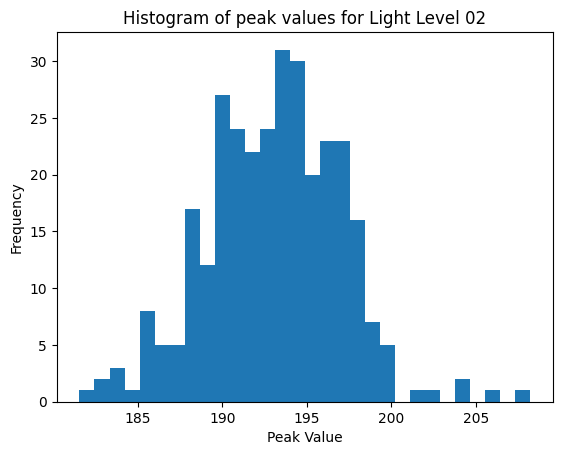

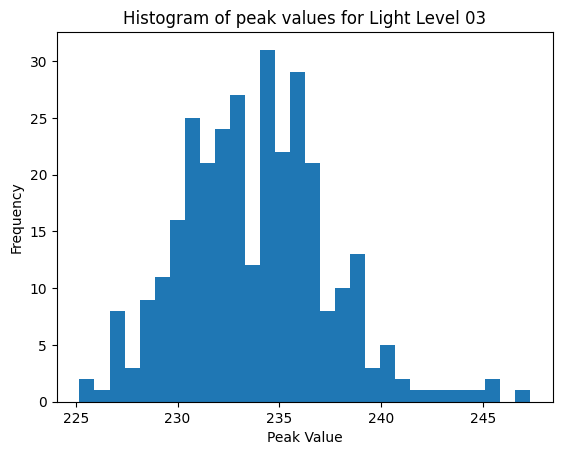

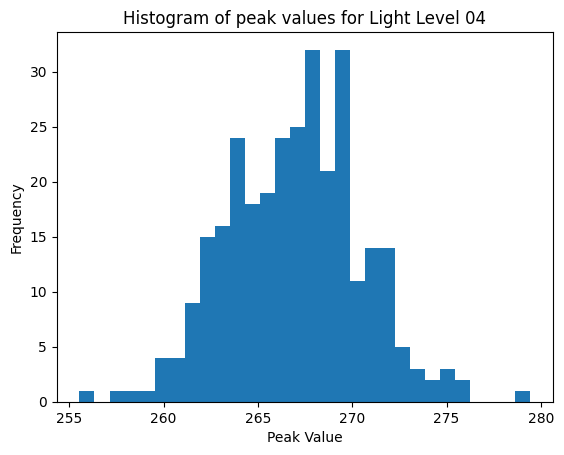

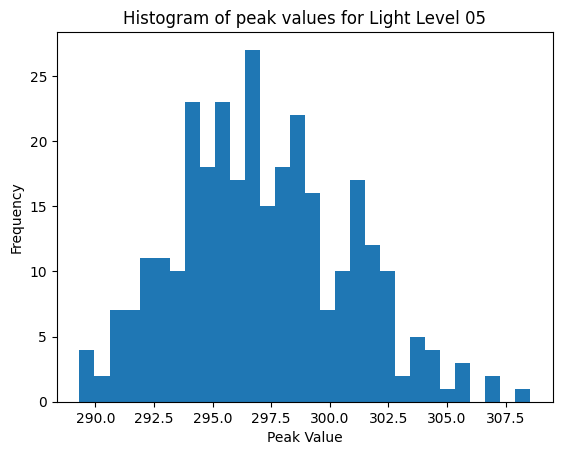

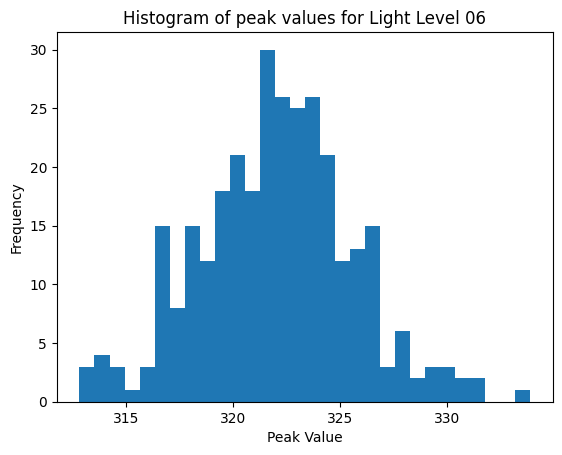

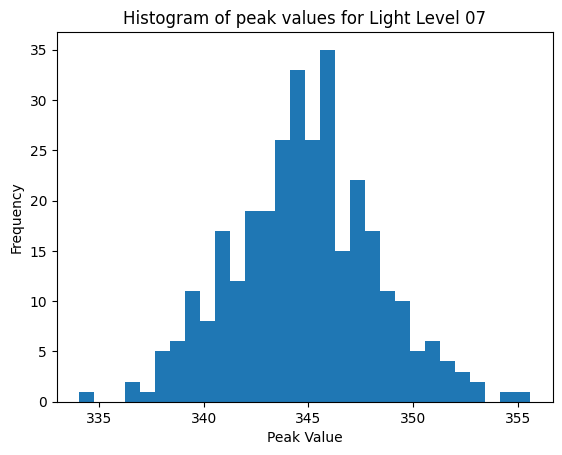

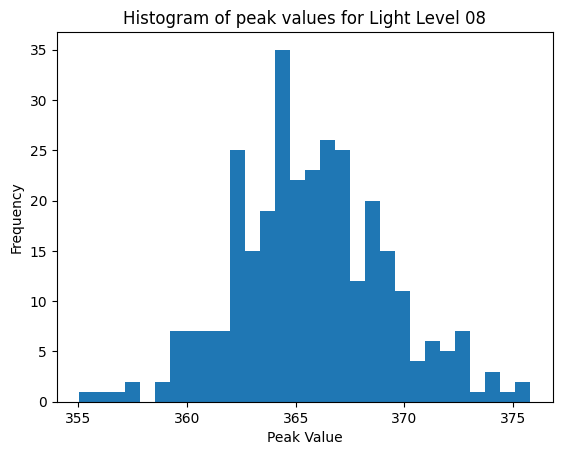

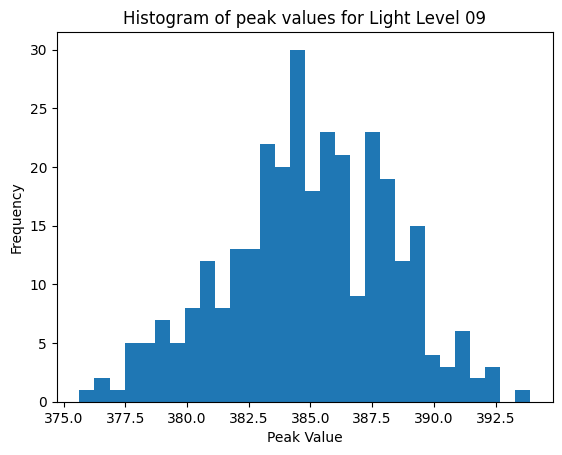

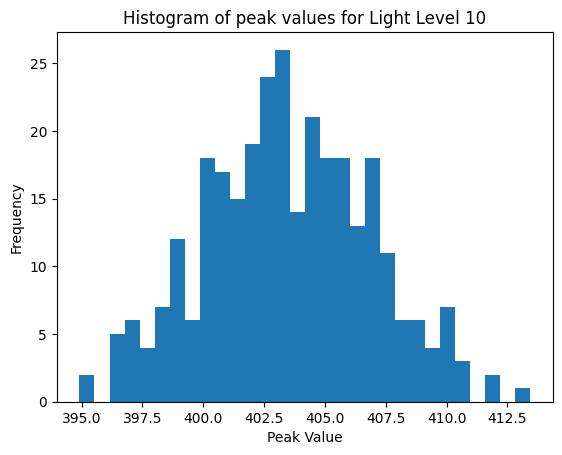

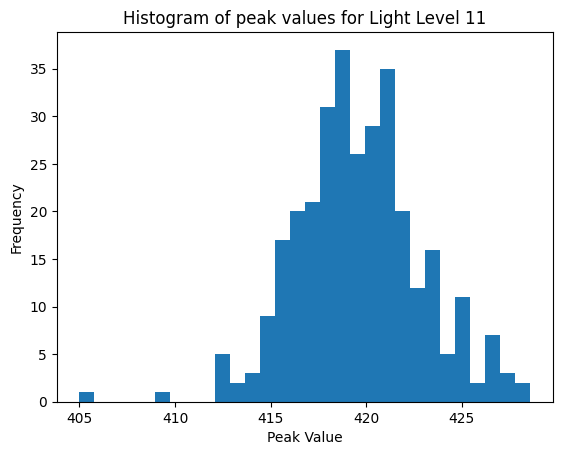

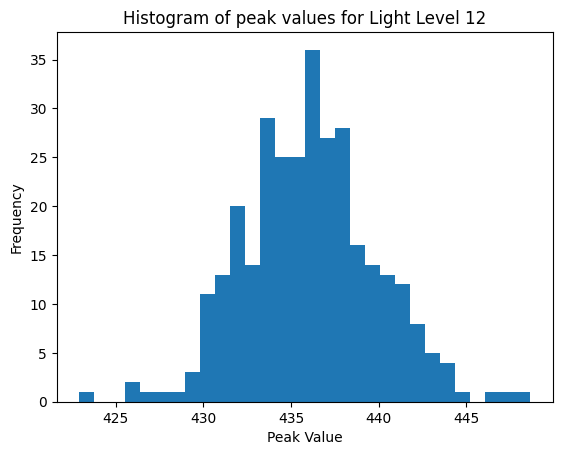

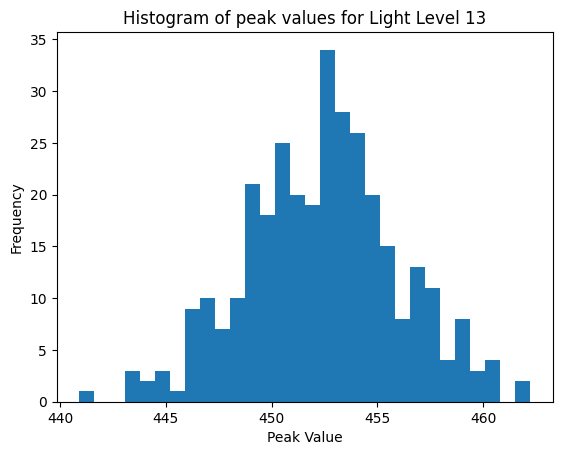

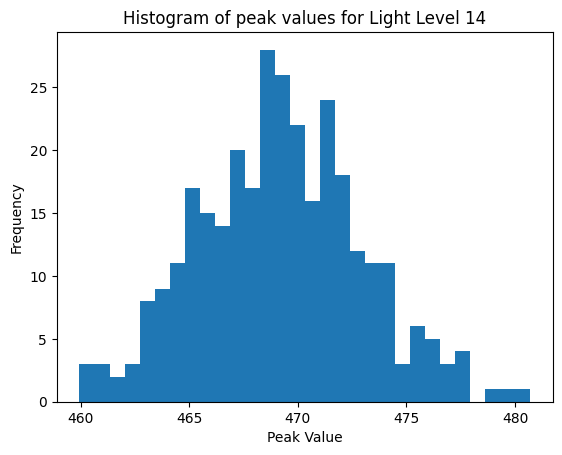

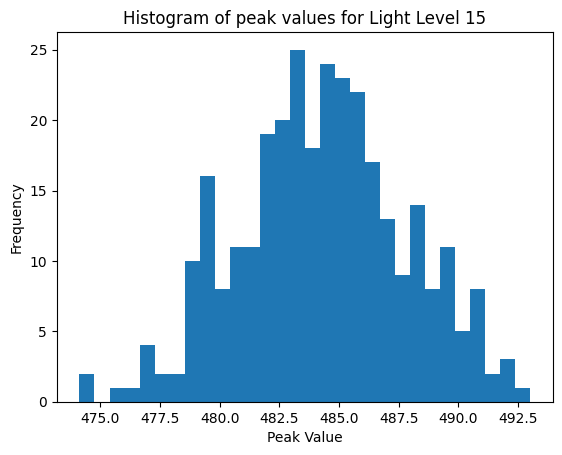

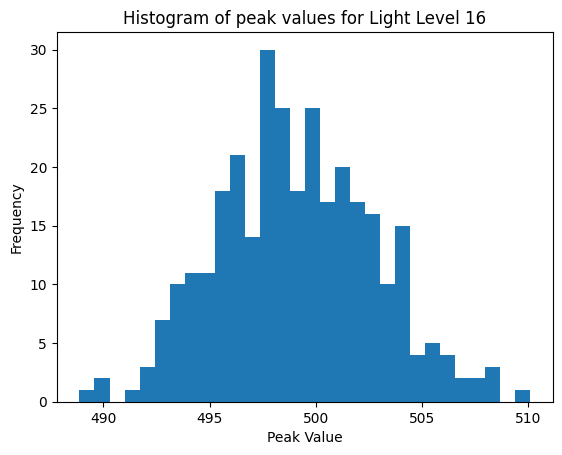

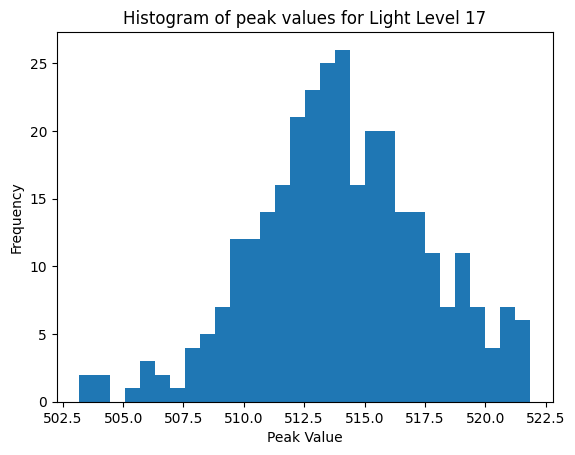

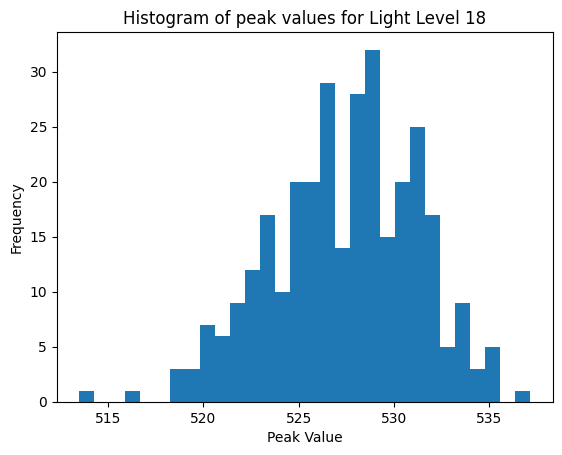

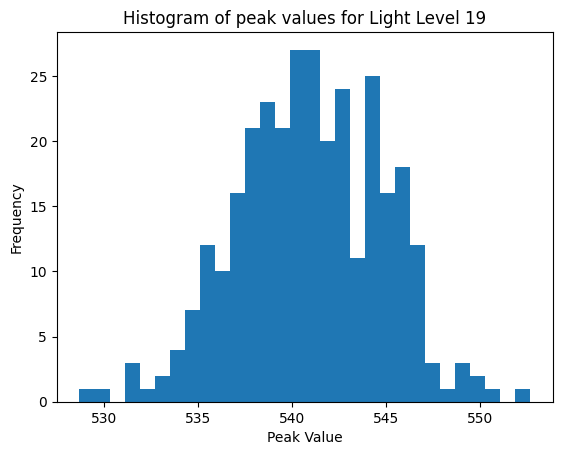

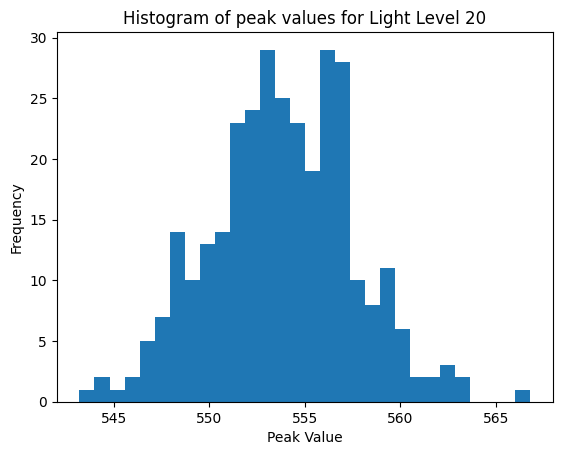

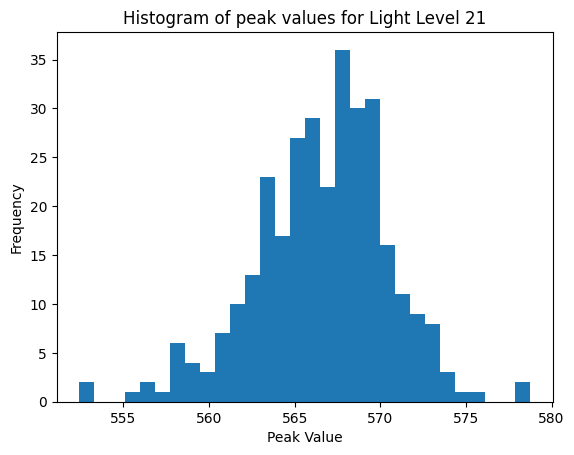

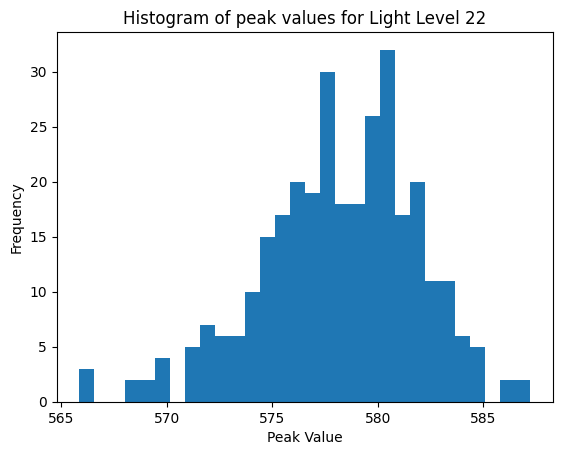

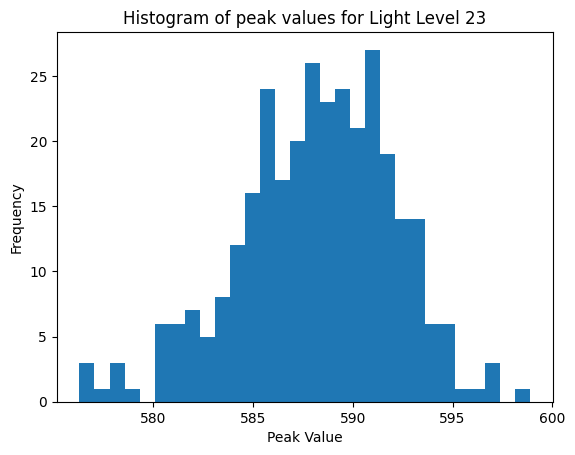

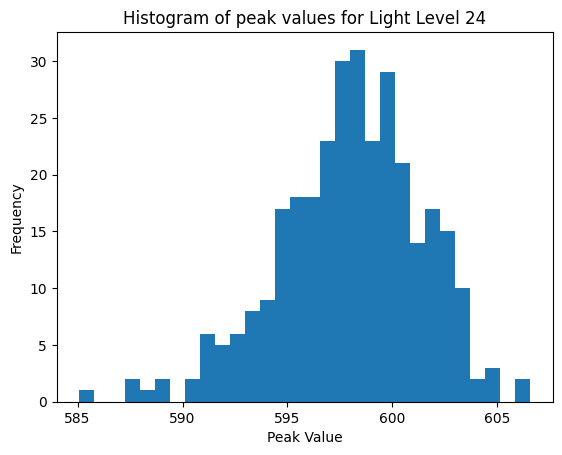

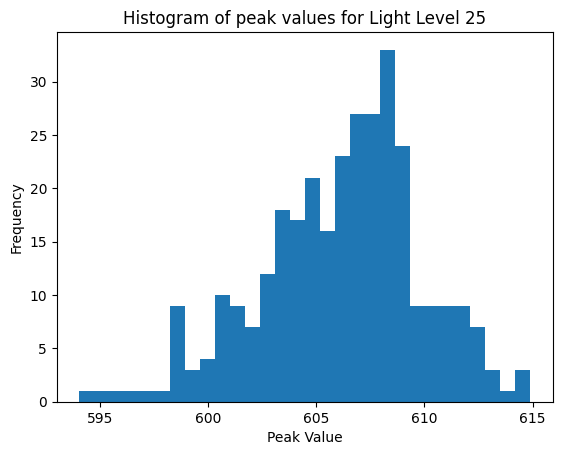

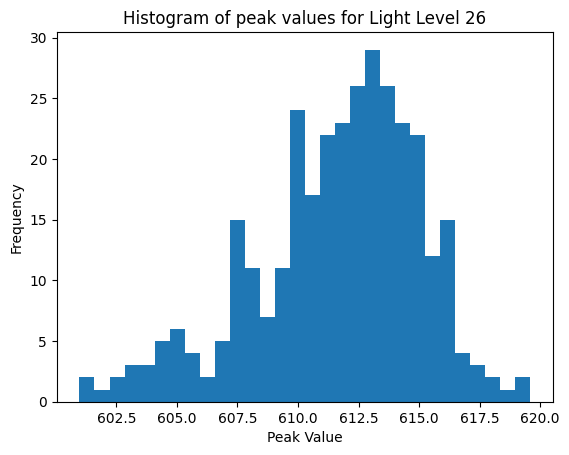

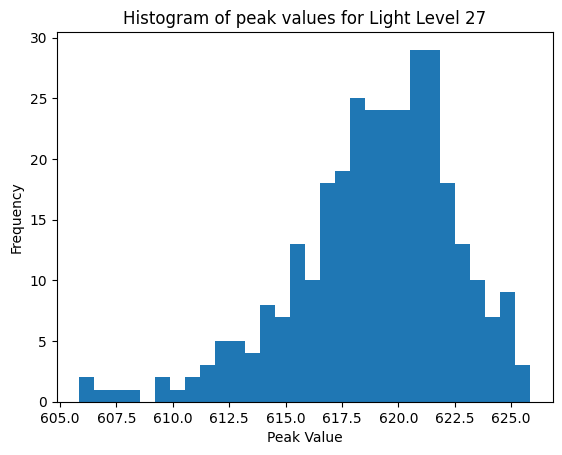

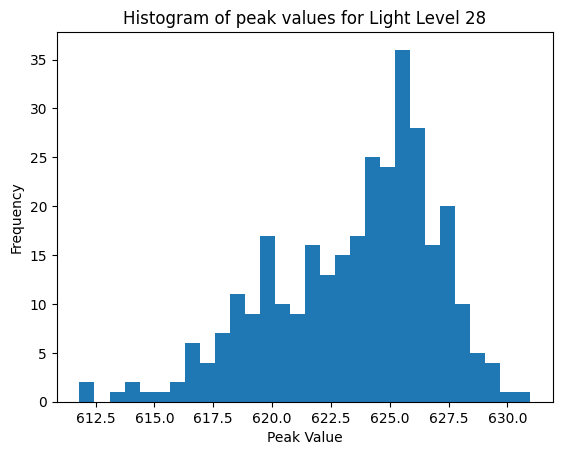

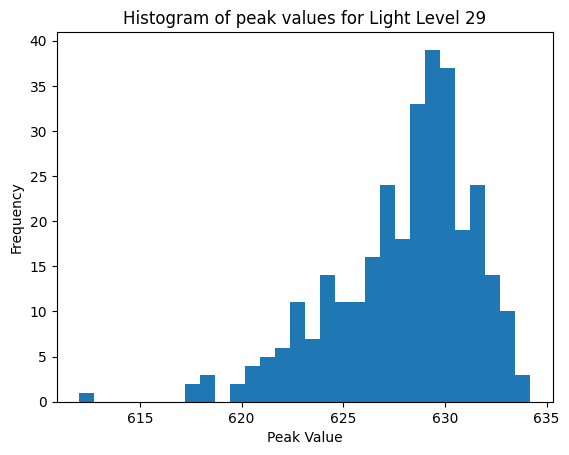

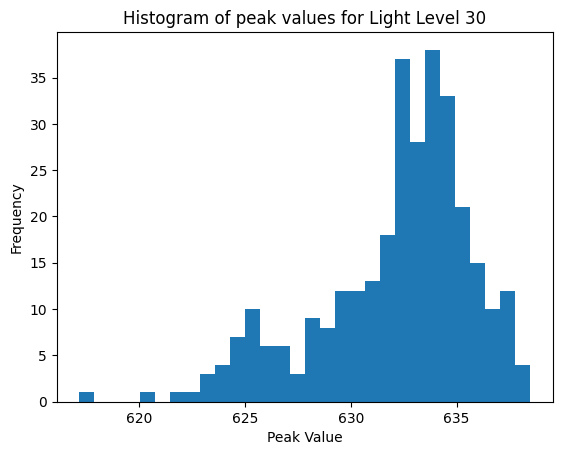

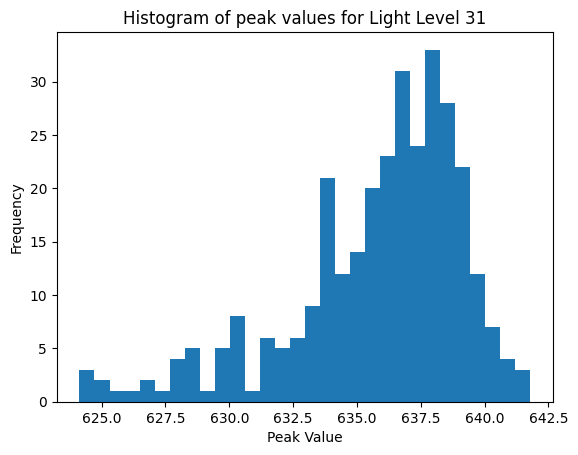

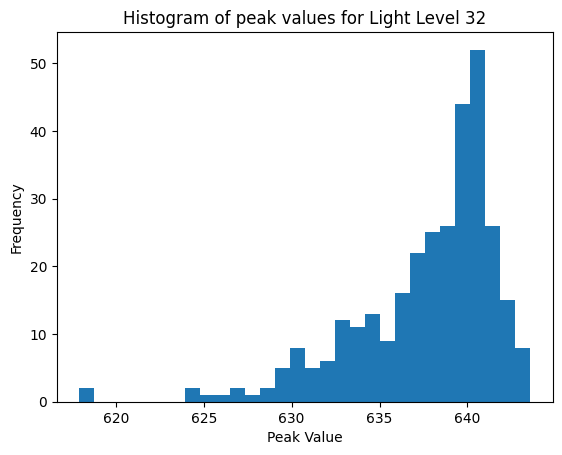

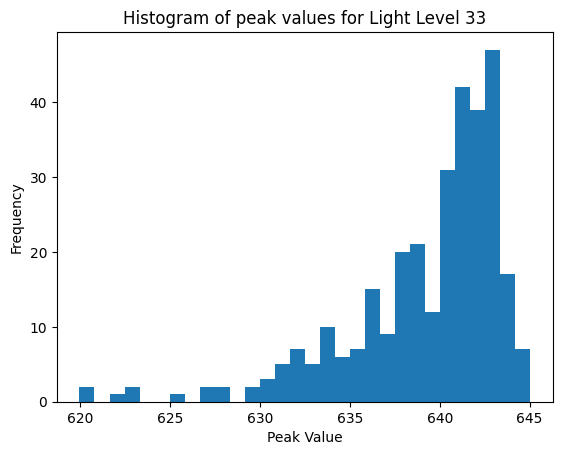

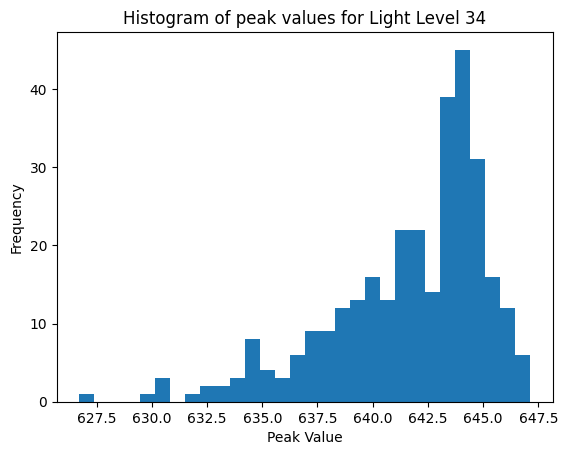

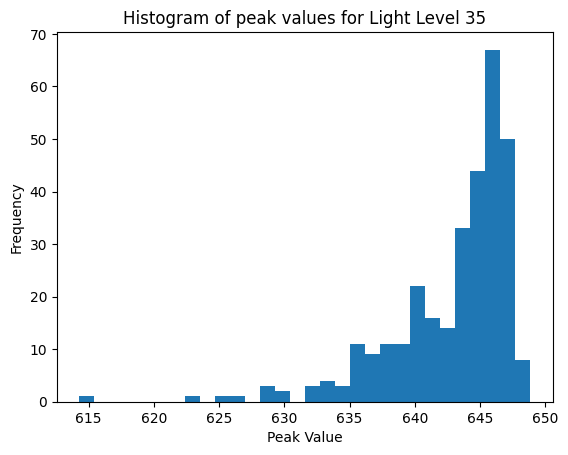

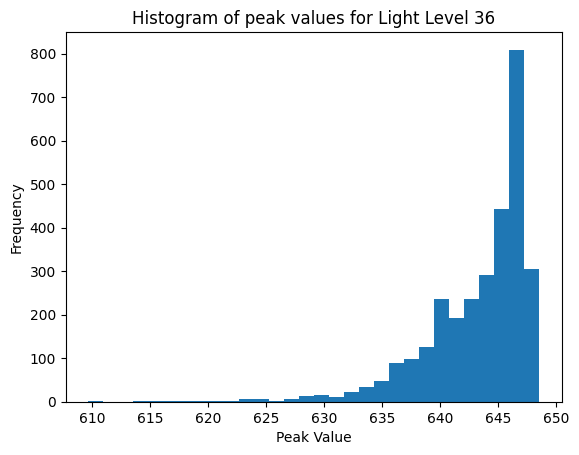

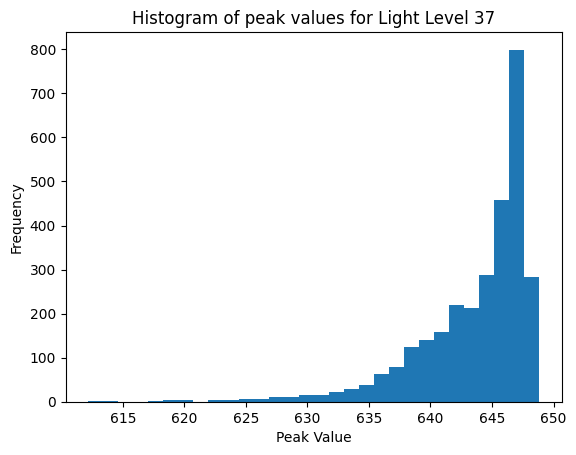

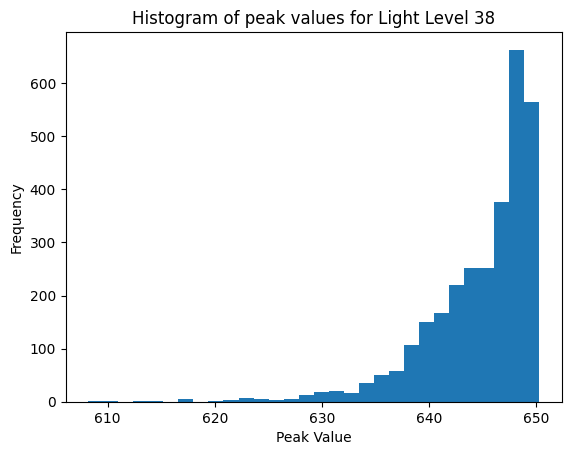

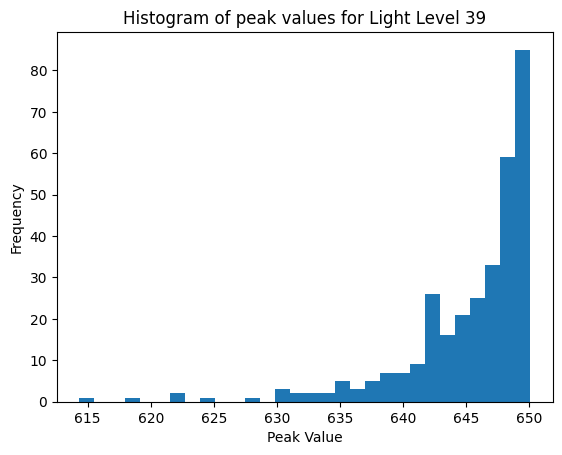

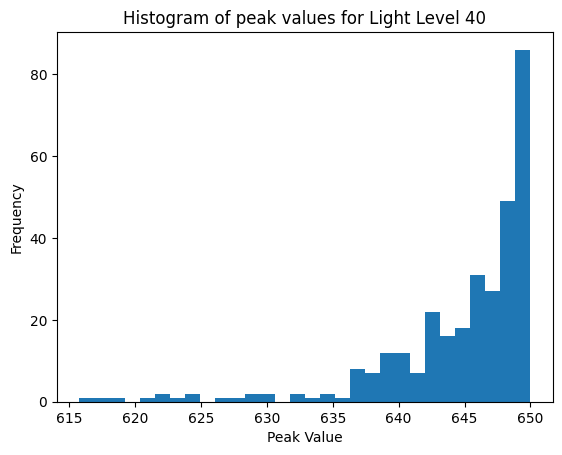

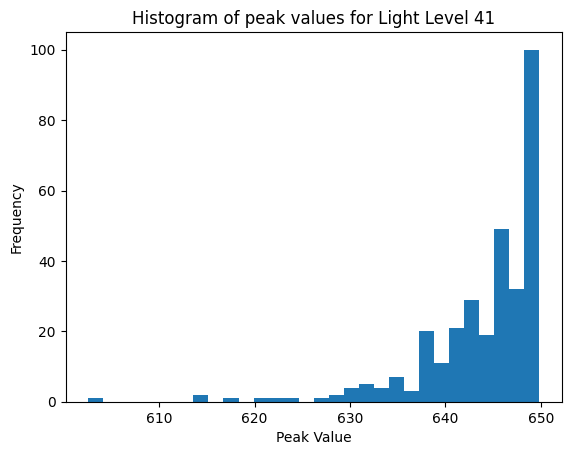

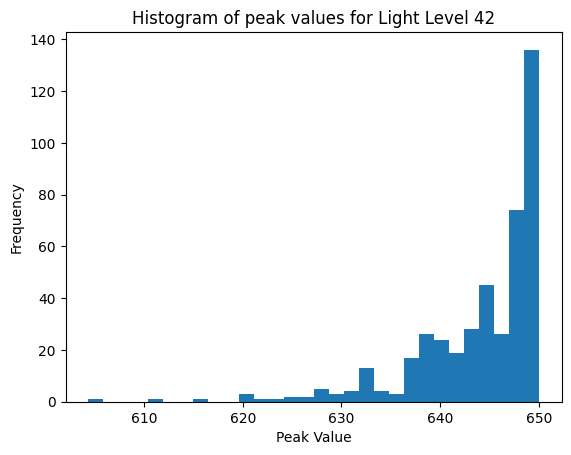

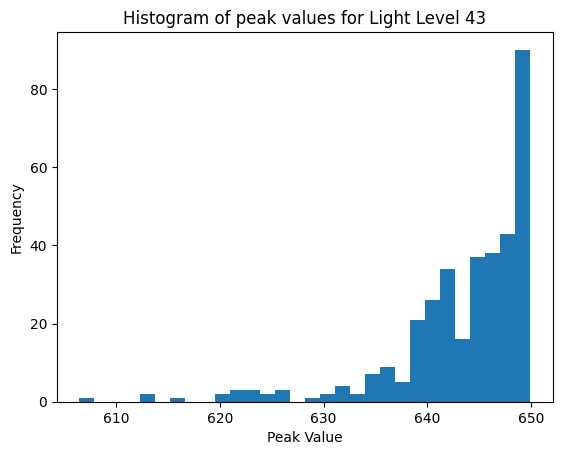

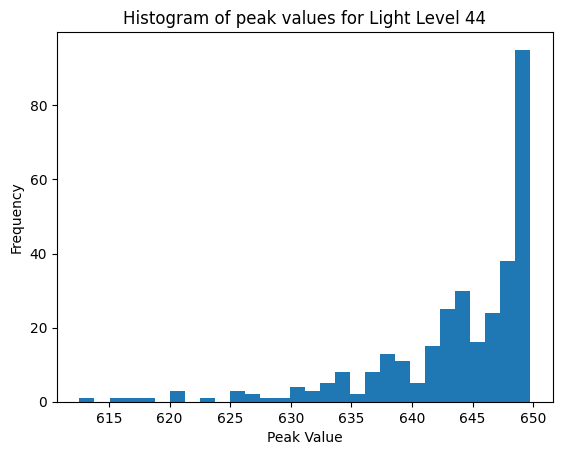

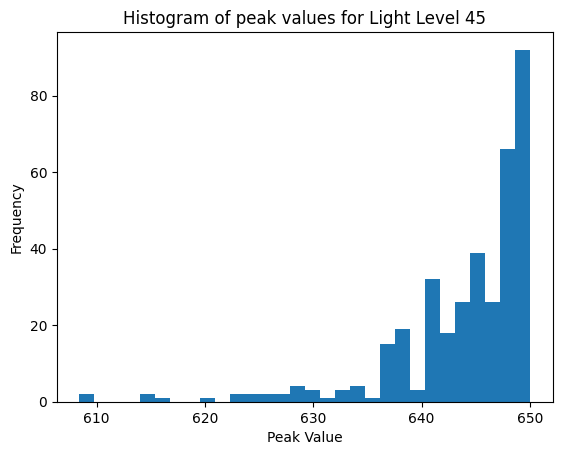

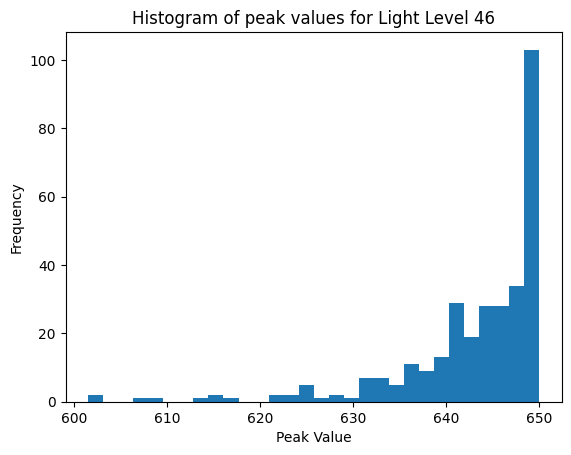

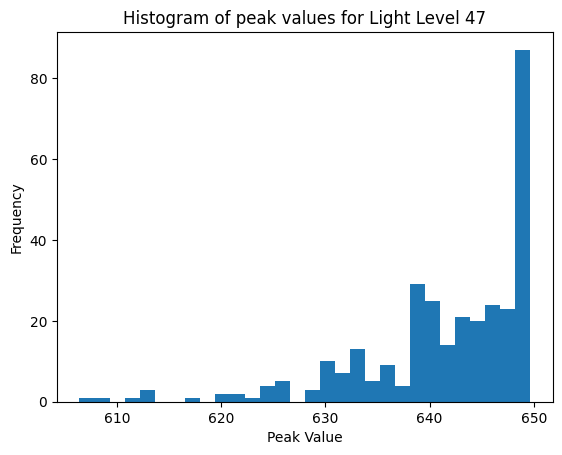

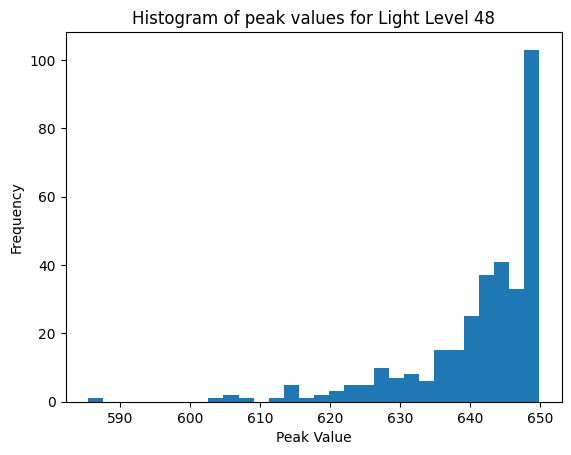

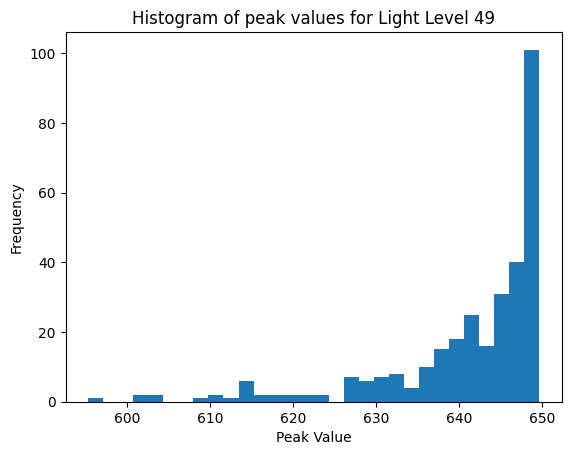

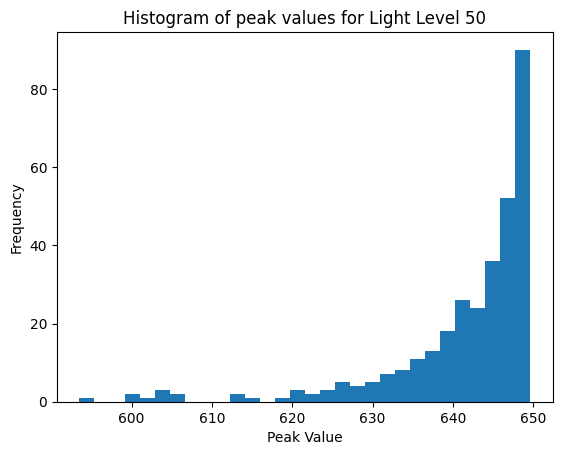

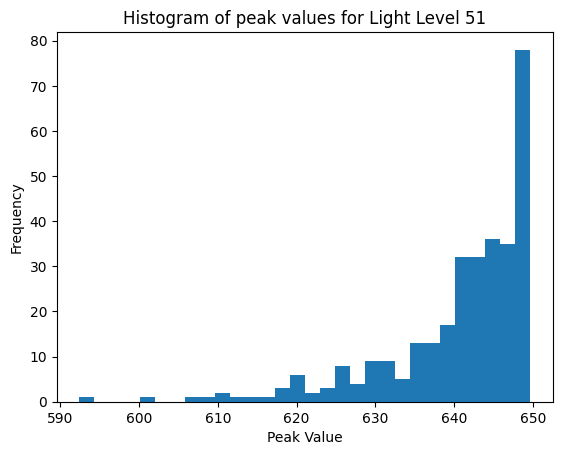

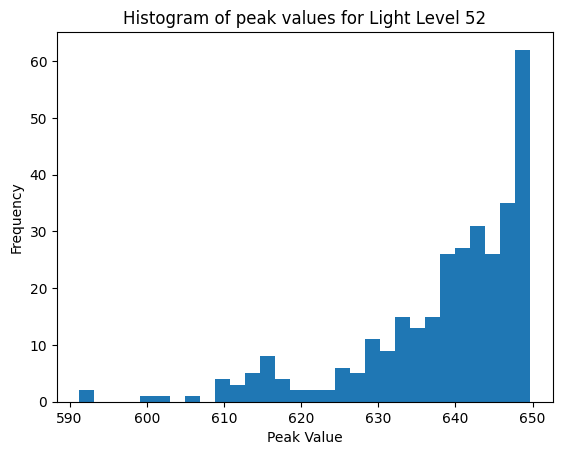

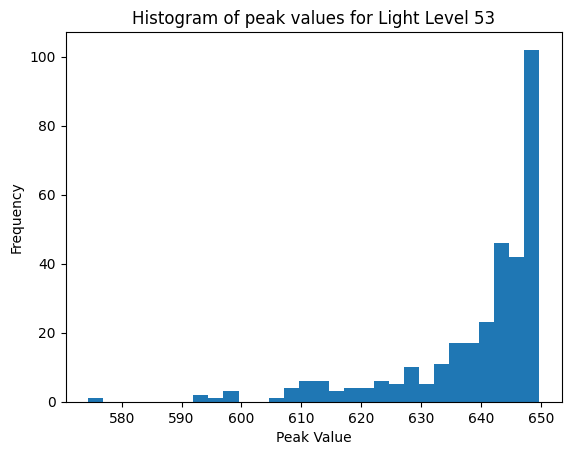

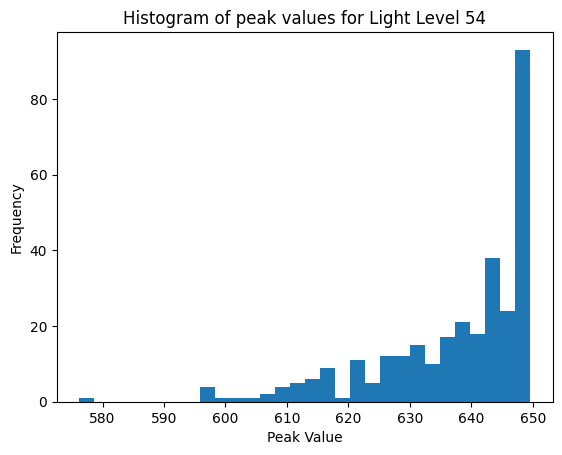

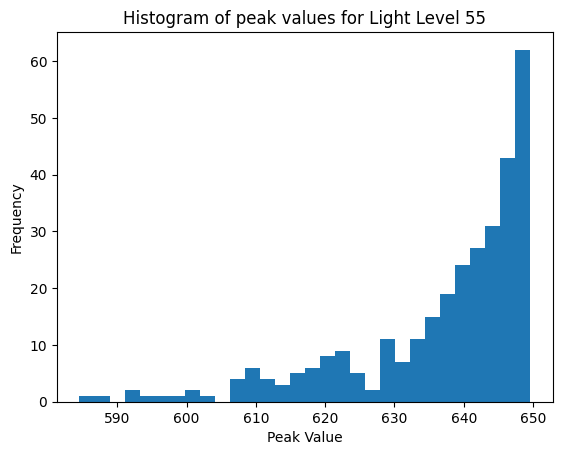

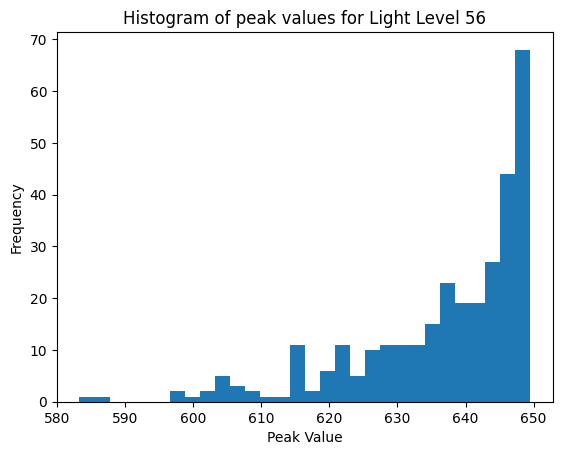

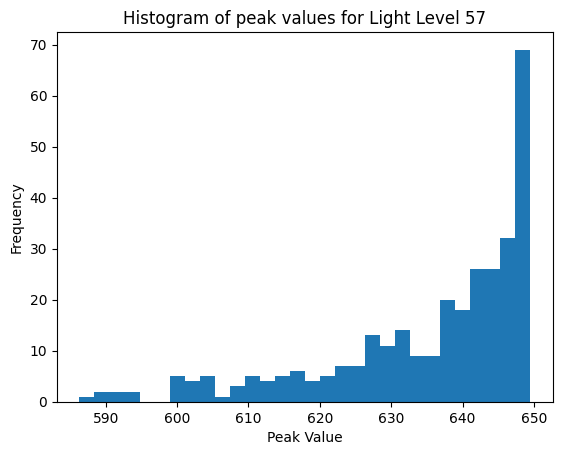

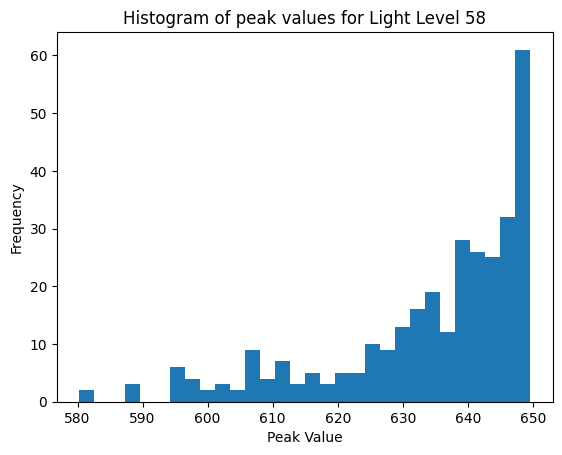

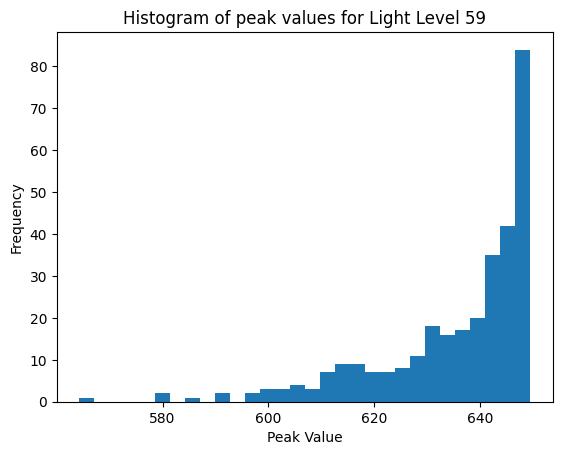

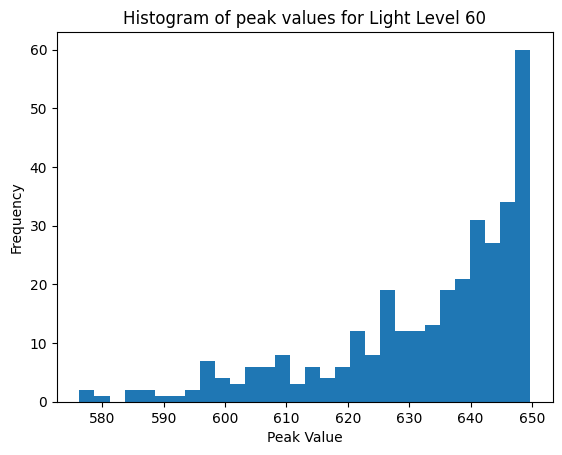

In [232]:
import matplotlib.pyplot as plt

for light_level in df_main['Subfolder'].unique():
    df_subset = df_main[df_main['Subfolder'] == light_level]
    plt.hist(df_subset['Peak'], bins=30)
    plt.title('Histogram of peak values for {}'.format(light_level))
    plt.xlabel('Peak Value')
    plt.ylabel('Frequency')
    plt.show()


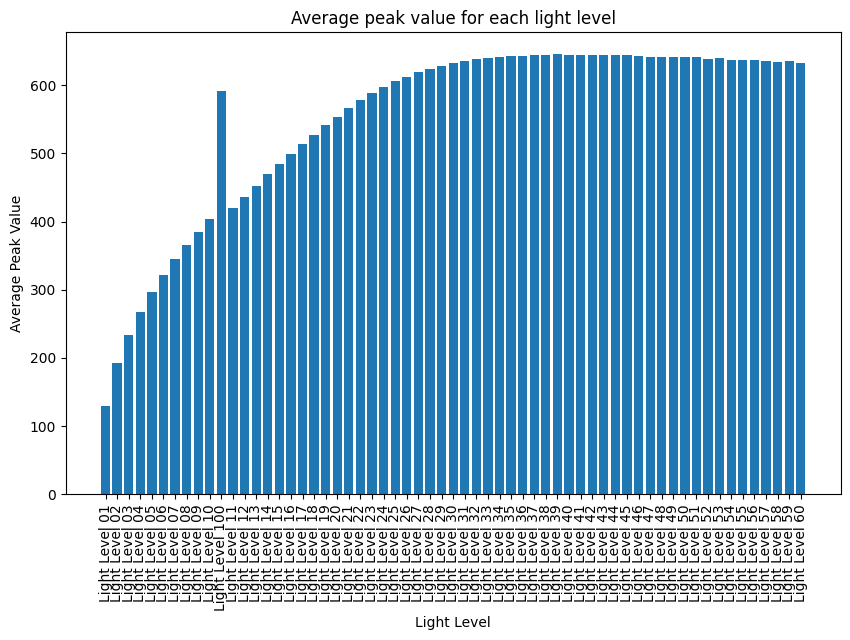

In [233]:
# compute average peak value for each light level
df_avg_peak = df_main.groupby('Subfolder')['Peak'].mean().reset_index()

# plot average peak value for each light level
plt.figure(figsize=(10, 6))
plt.bar(df_avg_peak['Subfolder'], df_avg_peak['Peak'])
plt.title('Average peak value for each light level')
plt.xlabel('Light Level')
plt.ylabel('Average Peak Value')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Convert 'Subfolder' into numeric values (assuming 'Light Level X' format)
df_main['Light_Level'] = df_main['Subfolder'].apply(lambda x: int(x.split(' ')[-1]))

# Group by 'Light_Level' and compute mean
df_mean = df_main.groupby('Light_Level')['Peak'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_mean['Light_Level'], df_mean['Peak'], marker='o')
plt.title('Average Peak Value Trend over Light Levels')
plt.xlabel('Light Level')
plt.ylabel('Average Peak Value')
plt.grid(True)
plt.show()
